In [19]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import datetime

##### Color schemes: Data Color Picker from learnui.design, Coolors #####

##### Import the data #####
JC240_data = pd.read_csv('JC240_data.csv')
JC241_data = pd.read_csv('JC241_data.csv')
JC258_data = pd.read_csv('JC258_data.csv')

In [20]:
##### Calculate accuracy for over all sessions for a given animal #####
def get_accuracy(JCxxx):
    data_JCxxx = str(JCxxx) + "_data" # concatenate strings
    data_JCxxx = globals()[data_JCxxx] # convert string to variable
    bysession_JCxxx = data_JCxxx.groupby("Session_ID")
    sessions = bysession_JCxxx["Session_ID"].unique().to_numpy(dtype=int)
    accuracy = np.zeros(len(sessions))
    for session in range(1, len(sessions)+1):
        accuracy[session-1] = round(bysession_JCxxx.get_group(session)["CorrectBool"].sum() / bysession_JCxxx.get_group(session).count()[0]*100, 0)
    return accuracy, sessions
    
accuracy_JC240, sessions_JC240 = get_accuracy("JC240")
accuracy_JC241, sessions_JC241 = get_accuracy("JC241")
accuracy_JC258, sessions_JC258 = get_accuracy("JC258")

In [21]:
##### Calculate arm choice by session #####
def get_arm_choice(JCxxx):
    data_JCxxx = str(JCxxx) + "_data" # get data
    data_JCxxx = globals()[data_JCxxx] # turn into variable
    bysession_JCxxx = data_JCxxx.groupby("Session_ID") # group by session
    sessions = bysession_JCxxx["Session_ID"].unique() # list sessions
    arms = np.array([3, 7]) # list arms of interest
    num_arms = len(arms) # count arms
    arm_choice = np.zeros((len(sessions), num_arms+1)) # make a vector that will hold arm choice for each session
                                                        # and add another column for other arms
    num_trials = np.zeros(len(sessions))
    for session in range(1, len(sessions)+1): # iterate over sessions, starting at 1 instead of 0
        num_trials[session-1] = bysession_JCxxx.get_group(session).count()[0] # count number of trials per session
        for arm in range(num_arms): # iterate over arms by indexing numpy array
            this_session = bysession_JCxxx.get_group(session)
            choices_bool = this_session["Arm"]==(arms[arm]) # Boolean of whether arm was chosen
            count = len(choices_bool[choices_bool==True])
            arm_choice[session-1][arm] = count
        arm_choice[session-1][-1] = num_trials[session-1] - arm_choice[session-1][0] - arm_choice[session-1][1]
                                    # for last column subtract arms of interest from total trials
    arm_choice = arm_choice / num_trials[:,None] # express arm choice as a proportion of total trials
    return num_trials, arm_choice

num_trials_JC240, arm_choice_JC240 = get_arm_choice("JC240")
num_trials_JC241, arm_choice_JC241 = get_arm_choice("JC241")
num_trials_JC258, arm_choice_JC258 = get_arm_choice("JC258")

In [61]:
##### MANUALLY HARD CODING, FIX LATER #####
# Accuracy is incorrect for day 12 because 3rd flavor was only introduced later
accuracy_JC241[13] = 63
print(accuracy_JC241[13])

63.0


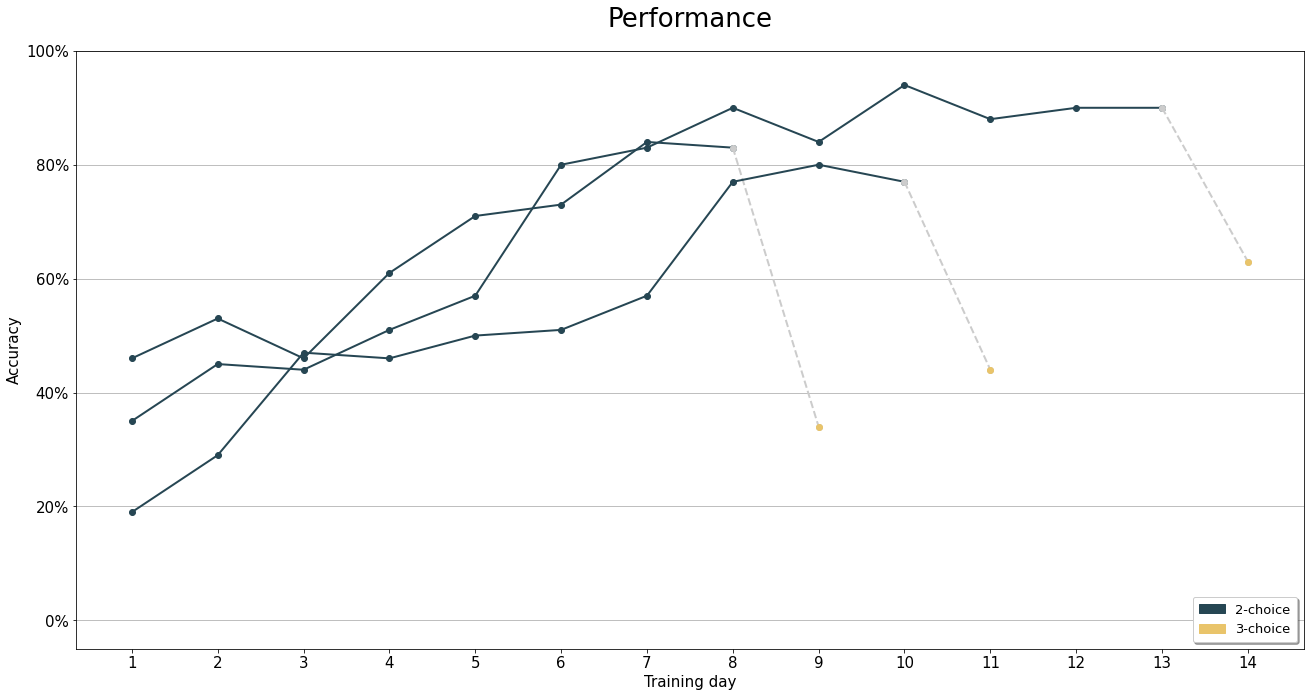

In [72]:
##### Plot accuracy and arm choice before third flavor introduced #####
fig = plt.figure(figsize=(22,11))
plt.tight_layout()

##### Colorscheme: empty, 2-choice, 3-choice, empty #####
# cscheme = ['#264653','#2a9d8f','0.9','#7a5195','#ffa600'] # Data Color Picker 1
# cscheme = ['#003f5c', '#58508d', '#bc5090', '#ff6361','#ffa600'] # Data Color Picker 2
cscheme = ["#264653","#2a9d8f", "#e9c46a","#b7410e"] # Coolors, modified
# cscheme = ['#1b9e77','#d95f02','0.9','#7570b3','#e7298a'] # Colorbrewer

##### Subplot 1 #####
##### Plot accuracy #####
ax1 = fig.add_subplot(111)

##### JC240 #####
ax1.plot(sessions_JC240[0:8], accuracy_JC240[0:8], color=cscheme[0], linewidth=2, marker='o') # 2 flavors
# ax1.plot(sessions_JC240[7:16], accuracy_JC240[7:16], color=cscheme[2], linewidth=2, marker='o') # 3 flavors with connecting line
ax1.plot(sessions_JC240[7:9], accuracy_JC240[7:9], color='0.8', linewidth=2, ls='--', marker='o') # gray line
# ax1.plot(sessions_JC240[8:16], accuracy_JC240[8:16], color=cscheme[2], linewidth=2, marker='o') # 3 flavors without line
ax1.plot(sessions_JC240[8:9], accuracy_JC240[8:9], color=cscheme[2], linewidth=2, marker='o') # only first day after introducing 3rd flavor

##### JC241 #####
ax1.plot(sessions_JC241[0:13], accuracy_JC241[0:13], color=cscheme[0], linewidth=2, marker='o') # 2 flavors
# ax1.plot(sessions_JC241[12:16], accuracy_JC241[12:16], color=cscheme[2], linewidth=2, marker='o') # 3 flavors with connecting line
ax1.plot(sessions_JC241[12:14], accuracy_JC241[12:14], color='0.8', linewidth=2, ls='--', marker='o') # gray line
# ax1.plot(sessions_JC241[13:16], accuracy_JC241[13:16], color=cscheme[2], linewidth=2, marker='o') # 3 flavors without line
ax1.plot(sessions_JC241[13:14], accuracy_JC241[13:14], color=cscheme[2], linewidth=2, marker='o') # only first day after introducing 3rd flavor

##### JC258 #####
ax1.plot(sessions_JC258[0:10], accuracy_JC258[0:10], color=cscheme[0], linewidth=2, marker='o') # 2 flavors
ax1.plot(sessions_JC258[9:11], accuracy_JC258[9:11], color='0.8', linewidth=2, ls='--', marker='o') # gray line
# ax1.plot(sessions_JC258[10:12], accuracy_JC258[10:12], color=cscheme[2], linewidth=2, marker='o') # 3 flavors without line
ax1.plot(sessions_JC258[10:11], accuracy_JC258[10:11], color=cscheme[2], linewidth=2, marker='o') # only first day after introducing 3rd flavor

##### Formatting #####
ax1.set_title("Performance", fontsize=26,y=1.03)
ax1.tick_params(labelsize=15)
ax1.set_xlabel("Training day", fontsize=15)
ax1.set_ylabel("Accuracy", fontsize=15)
# ax1.set_xlim(0.5,8.5) # just to align the two subplot x-axes
ax1.xaxis.set_major_locator(mtick.MultipleLocator(1))
ax1.set_ylim(-5,100)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
ax1.yaxis.grid()
# ax1.margins(x=0.05)

##### Legend #####
twoChoice = mpatches.Patch(color=cscheme[0], label = '2-choice')
threeChoice = mpatches.Patch(color=cscheme[2], label = '3-choice')
ax1.legend(handles=[twoChoice, threeChoice], loc=4, fontsize=13, fancybox=True, shadow=1, borderpad=0.5)


# # Subplot 2
# # Plot arm choice
# ax2 = fig.add_subplot(212)
# ax2.bar(sessions_JC240[0:8], arm_choice_mean[0:8,0], color='#58508d', yerr = arm_choice_sem[:,0])
# ax2.bar(sessions_JC240[0:8], arm_choice_mean[0:8,1], color='#bc5090', yerr = arm_choice_sem[:,1], bottom=arm_choice_mean[0:8,0]) # arm 7
# ax2.bar(sessions_JC240[0:8], arm_choice_mean[0:8,2], color='#ffa600', yerr = arm_choice_sem[:,2], bottom=arm_choice_mean[0:8,0]+arm_choice_mean[0:8,1]) # other arms
# # Formatting
# ax2.set_title("Animals learn to ignore unrewarded arms with training", fontsize=26)
# ax2.tick_params(labelsize=15)
# ax2.set_xlabel("Training day", fontsize=15)
# ax2.set_ylabel("Proportion of arm chosen", fontsize=15)
# ax2.set_xlim(0.5,8.5)
# ax2.xaxis.set_major_locator(mtick.MultipleLocator(1))
# ax2.yaxis.set_ticks(np.arange(0,1.4,0.2))
# ax2.margins(y=0.2) # margins to make room for the legend
# # Legend
# chocolate_arm = mpatches.Patch(color='#58508d', label = 'Chocolate-rewarded arm')
# honey_arm = mpatches.Patch(color='#bc5090', label = 'Honey loop-rewarded arm')
# other_arm = mpatches.Patch(color='#ffa600', label = 'Unrewarded arms')
# ax2.legend(handles=[other_arm, chocolate_arm, honey_arm], loc=2, fontsize=13, fancybox=True, shadow=1, borderpad=0.5)


plt.show()
timestamp = datetime.datetime.today().strftime("%Y-%m-%d %H%M%S")
# plt.savefig("Accuracy "+timestamp+".png")